# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

In [81]:
recordingData = loader.getRecordingData('19') 
recordingData.backgroundImagePath

INFO:root:Downsampling recording 19 from 25.0 to 2.5
downsampling: 100%|█████████████████████████████████████████████████████████| 492008/492008 [00:30<00:00, 15933.90it/s]


'G:AV datasets/inD-dataset-v1.0/data/19_background.png'

In [7]:
recordingData.tracksMetaDf.head()

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class,crossing,turn,onStreet
0,19,0,0,105,106,1.97574,4.73697,car,no,no,no
1,19,1,0,65,66,1.86671,4.55969,car,no,no,no
2,19,2,0,341,342,0.00000,0.00000,pedestrian,no,yes,no
3,19,3,0,24835,24836,2.06339,4.50165,car,no,no,no
4,19,4,0,24835,24836,1.82690,4.24700,car,no,no,no


In [8]:
recordingData.tracksMetaDf["class"].unique()

array(['car', 'pedestrian', 'bicycle', 'truck_bus'], dtype=object)

In [10]:
# recordingData.getCarIds()

In [11]:
# recordingData.getLargeVehicleIds()

In [12]:
# recordingData.getBicycleIds()

In [13]:
# recordingData.getPedIds()

In [14]:
# recordingData.getVehicleIds()

In [15]:
# frameDf = recordingData.getDfByFrameSpan(0, 0)

In [16]:
# len(frameDf)

In [17]:
# recordingData.getDfById(41)

In [82]:

from tools.UnitUtils import UnitUtils
allLocationSceneConfig = UnitUtils.loadSceneConfiguration()
sceneConfigs = allLocationSceneConfig['2']
sceneId = 11
sC = sceneConfigs[str(sceneId)]
print(sC)
sceneData = recordingData.getSceneData(sceneId, sC, refresh=True)


{'centerXPixel': 688.5, 'centerYPixel': 273.5, 'centerX': 67.3, 'centerY': -26.74, 'angle': 12.17, 'roadWidth': 5.0, 'boxWidth': 5.0}


recording-19-scene11-truck_bus-Ids: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 97.97it/s]


KeyError: "['lonVelocity' 'latVelocity' 'lonAcceleration' 'latAcceleration'] not found in axis"

In [69]:
pedDf = sceneData.getPedDataInSceneCoordinates()
pedDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,19,40,1999,110,65.38982,-29.74168,123.24568,0.0,0.0,-1.20167,...,0.28879,19040,10,5.0,3.495993,-2.525436,0.836094,-2.078956,0.284845,0.218230
3,19,40,2009,120,64.92454,-28.94136,122.66286,0.0,0.0,-1.21674,...,0.14726,19040,10,5.0,3.209887,-1.645015,0.715264,-2.201053,0.302075,0.305241
4,19,40,2019,130,64.41796,-28.11242,123.32692,0.0,0.0,-1.27560,...,-0.06193,19040,10,5.0,2.889443,-0.727911,0.801110,-2.292761,-0.214615,0.229271
5,19,40,2029,140,63.89306,-27.29404,125.21769,0.0,0.0,-1.33738,...,-0.22881,19040,10,5.0,2.548865,0.182733,0.851446,-2.276610,-0.125840,-0.040379
6,19,40,2039,150,63.34764,-26.51882,128.25877,0.0,0.0,-1.40034,...,-0.31349,19040,10,5.0,2.179129,1.055513,0.924340,-2.181949,-0.182235,-0.236651


In [70]:
otherDf = sceneData.getOtherDataInSceneCoordinates()
otherDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,19,16,302,70,38.27716,-32.99946,10.65386,2.06353,5.15411,6.91869,...,19016,10,5.0,car,-23.694131,0.005699,-7.067459,0.267166,-0.437622,-0.330739
3,19,16,312,80,41.06384,-32.51196,10.82879,2.06353,5.15411,7.07186,...,19016,10,5.0,car,-20.867306,-0.105226,-7.067062,0.277311,-0.000994,-0.025360
4,19,16,322,90,43.96534,-31.99766,10.98268,2.06353,5.15411,7.52231,...,19016,10,5.0,car,-17.922592,-0.214158,-7.361785,0.272330,0.736809,0.012451
5,19,16,332,100,47.10503,-31.43942,10.76852,2.06353,5.15411,8.17264,...,19016,10,5.0,car,-14.735778,-0.330351,-7.967035,0.290483,1.513126,-0.045381
6,19,16,342,110,50.52537,-30.82353,10.62953,2.06353,5.15411,8.93215,...,19016,10,5.0,car,-11.262468,-0.449354,-8.683276,0.297508,1.790601,-0.017564


In [71]:

# other = otherDf[otherDf["uniqueTrackId"]==19108]
# other

In [72]:
# otherFull = sceneData.otherData[sceneData.otherData["uniqueTrackId"] == 19108]
# otherFull

In [77]:

# scenePolygon = TrajectoryUtils.scenePolygon(
#     sceneData.sceneConfig, sceneData.sceneConfig["boxWidth"] + 50, sceneData.sceneConfig["roadWidth"] + 10)

# clippedDf = TrajectoryUtils.clipByRect(
#     otherFull, "xCenter", "yCenter", "frame", scenePolygon)

# if TrajectoryUtils.length(clippedDf, "xCenter", "yCenter") < sceneData.sceneConfig["roadWidth"]:
#     logger.debug(
#         f"Disregarding trajectory for {otherId} because the length is too low")
# clippedDf
pedScene = pedDf[pedDf["uniqueTrackId"] == 19063]
pedFull = sceneData.pedData[sceneData.pedData["uniqueTrackId"] == 19063]
scenePolygon = TrajectoryUtils.scenePolygon(
    sceneData.sceneConfig, sceneData.sceneConfig["boxWidth"], sceneData.sceneConfig["roadWidth"])

clippedDf = TrajectoryUtils.clipByRect(
    pedFull, "xCenter", "yCenter", "frame", scenePolygon)

length = TrajectoryUtils.length(clippedDf, "xCenter", "yCenter")
if length < sceneData.sceneConfig["roadWidth"] - 1:
    print(
        f"Disregarding trajectory for {19063} because the {length} is too low")
clippedDf

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth
501,19,63,3315,210,56.76680,-28.66760,332.75963,0.0,0.0,2.79195,-1.30529,0.08304,-0.31529,19063,10,5.0
502,19,63,3325,220,57.89168,-29.21506,331.27534,0.0,0.0,2.81261,-1.45765,-0.07588,-0.35640,19063,10,5.0
503,19,63,3335,230,59.01175,-29.83247,329.53064,0.0,0.0,2.74044,-1.59885,-0.28185,-0.26965,19063,10,5.0
504,19,63,3345,240,60.08417,-30.49497,327.81198,0.0,0.0,2.57787,-1.67861,-0.35916,-0.16987,19063,10,5.0
505,19,63,3355,250,61.07345,-31.17188,326.38898,0.0,0.0,2.44141,-1.73746,-0.21941,-0.14528,19063,10,5.0


In [78]:
pedScene

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
147,19,63,3335,230,59.01175,-29.83247,329.53064,0.0,0.0,2.74044,...,-0.26965,19063,10,5.0,-2.757879,-1.269606,-2.411850,2.099150,-0.121552,-0.421025
148,19,63,3345,240,60.08417,-30.49497,327.81198,0.0,0.0,2.57787,...,-0.16987,19063,10,5.0,-1.849224,-2.143297,-2.271638,2.184228,-0.350529,-0.212696
149,19,63,3355,250,61.07345,-31.17188,326.38898,0.0,0.0,2.44141,...,-0.14528,19063,10,5.0,-1.024878,-3.013548,-2.060865,2.175626,-0.526934,0.021505


In [75]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

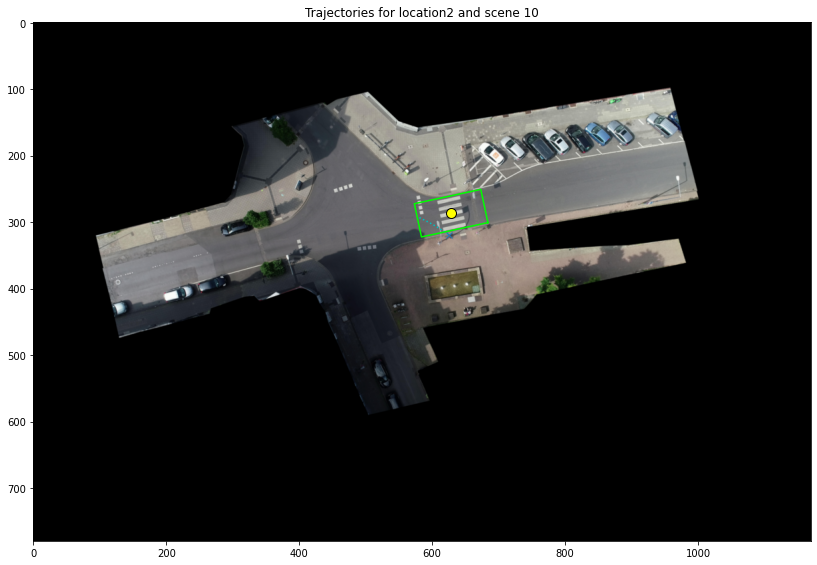

In [76]:
# visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True, ids=[19063])

In [45]:
localMeta = sceneData.getMeta()

In [52]:
localMeta.sort_values(by=['numFrames'])

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
8,19063,3335,3345,3,pedestrian,EAST,SOUTH
3,19049,2604,2614,4,pedestrian,EAST,SOUTH
116,19246,17290,17300,7,bicycle,EAST,SOUTH
15,19149,9823,9833,8,pedestrian,WEST,NORTH
0,19040,1999,2009,8,pedestrian,WEST,NORTH
...,...,...,...,...,...,...,...
47,19078,4638,4648,61,car,EAST,SOUTH
105,19069,3777,3787,68,bicycle,EAST,NORTH
90,19300,21106,21116,72,car,EAST,SOUTH
119,19262,18570,18580,90,bicycle,EAST,NORTH


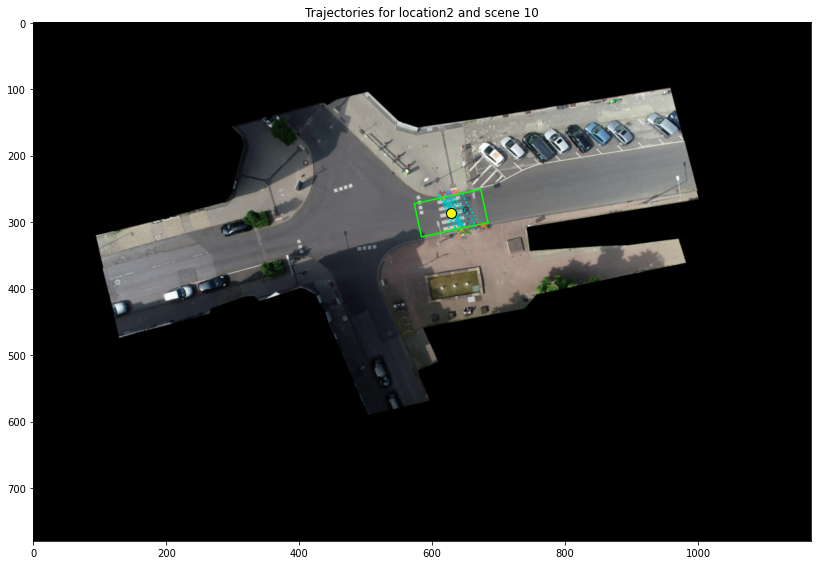

In [42]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True)

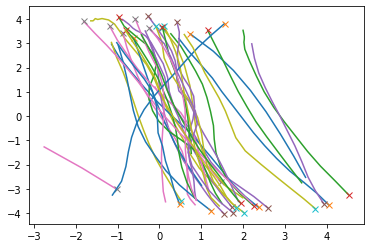

In [44]:
pedDf = sceneData.getPedDataInSceneCoordinates()
visualizer.showLocalTrajectories(pedDf, "uniqueTrackId", "sceneX", "sceneY")